# **Data Analysis on Movies from Top streaming platforms**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/Users/mac/Downloads/moviestreams.csv')

In [33]:
#we check the number of availabe rows and columns
df.shape

(16744, 17)

In [34]:
# CHECK THE NAMES OF THE COLUMN IN THIS DATA SET

df.columns.tolist()



['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [35]:
#Drop unwanted columns
df.drop(['Unnamed: 0','ID',], axis= 1, inplace = True)

In [36]:
df.columns.tolist()

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [37]:
#check for total number of missing values in each column
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [21]:
df.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Questions

### 1). What was the top genre(s) of Movies streamed by each platforms?
### 2). Which particular age group had the most movies in their platform?
### 3). What are the Top Movie(s) in each Platform

In [40]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [44]:
age_copy = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
df['New_age'] = df['Age'].map(age_copy)

In [46]:
df[['New_age']]

,New_age
0,13.0
1,18.0
2,13.0
3,7.0
4,18.0
...,...
16739,NaN
16740,7.0
16741,NaN
16742,NaN


### Removing the percentage sign besides the score of the Rotten Tomatoes

In [48]:
df[['Rotten Tomatoes']].dtypes

Rotten Tomatoes    object
dtype: object

In [52]:

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')
for i in df['Rotten Tomatoes']:
    if i == str:
        i.astype(int)
df['Rotten Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: Rotten Tomatoes, Length: 16744, dtype: object

In [66]:
 age_count= df['Age']. value_counts()

In [65]:
 age_index  = df['Age'].value_counts().index

Text(0.5, 1.0, 'Number of Movies in specific Age group in all streams')

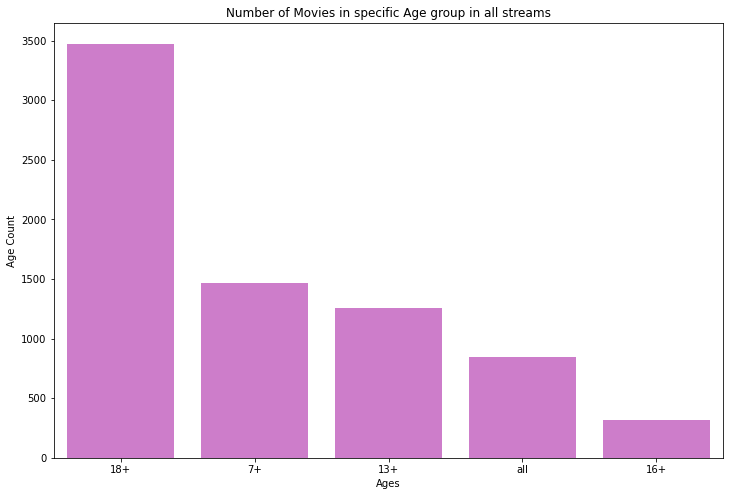

In [82]:
Age = df.Age.value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(x = age_index, y = age_count, color = 'orchid')

ax.set_xlabel("Ages")
ax.set_ylabel("Age Count")

ax.set_title('Number of Movies in specific Age group in all streams') 
 

In [92]:
age_index

Index(['18+', '7+', '13+', 'all', '16+'], dtype='object')

In [85]:
netflix_df = df[df['Netflix']==1]
netflix_age_count =netflix_df['Age'].value_counts()

Text(0.5, 1.0, 'Number of Movies in specific age group in Netflix')

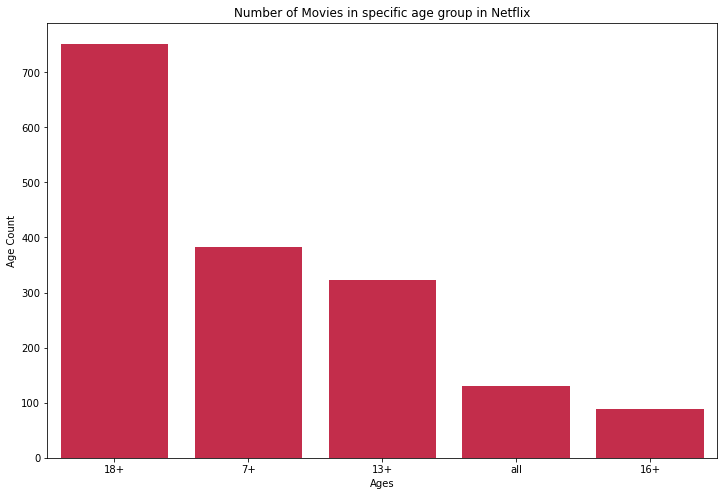

In [97]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = netflix_df, x = age_index, y = netflix_age_count, color = 'crimson')
ax.set_xlabel("Ages")
ax.set_ylabel("Age Count")

ax.set_title('Number of Movies in specific age group in Netflix') 
 

In [98]:
Amazon_df = df[df['Prime Video']==1]
Amazon_age_count =Amazon_df['Age'].value_counts()

Text(0.5, 1.0, 'Number of Movies in specific age group in Prime Video')

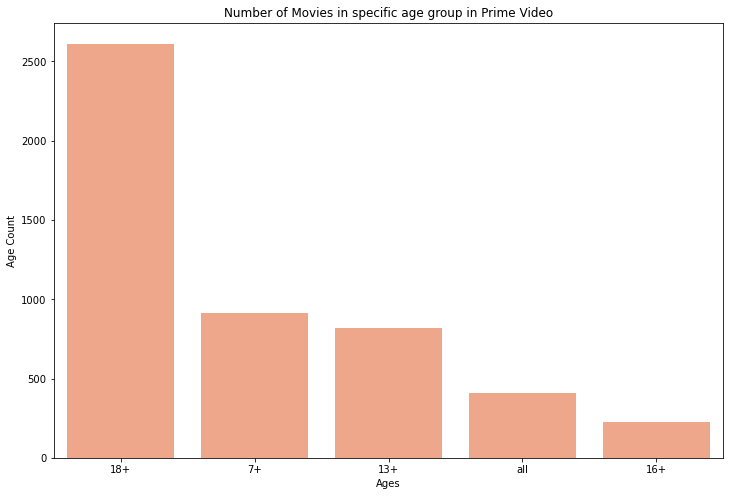

In [103]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = Amazon_df, x = age_index, y = Amazon_age_count, color = 'lightsalmon')
ax.set_xlabel("Ages")
ax.set_ylabel("Age Count")

ax.set_title('Number of Movies in specific age group in Prime Video') 
 

In [100]:
Disney_df = df[df['Disney+']==1]
Disney_age_count =Disney_df['Age'].value_counts()

Text(0.5, 1.0, 'Number of Movies in specific age group in Disney+')

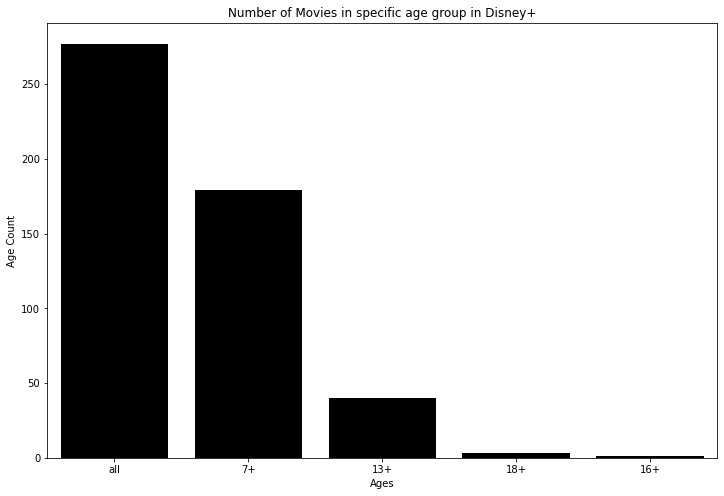

In [115]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = Disney_df, x = age_index, y = Disney_age_count, color = 'black')
ax.set_xlabel("Ages")
ax.set_ylabel("Age Count")

ax.set_title('Number of Movies in specific age group in Disney+') 
 

In [122]:
 Hulu_df = df[df['Hulu']==1]
Hulu_count =Disney_df['Age'].value_counts()

In [131]:
Hulu = Hulu_df['Age'].value_counts()

In [134]:
 age_hulu = Hulu.index

Text(0.5, 1.0, 'Number of Movies in specific age group in Hulu  Video')

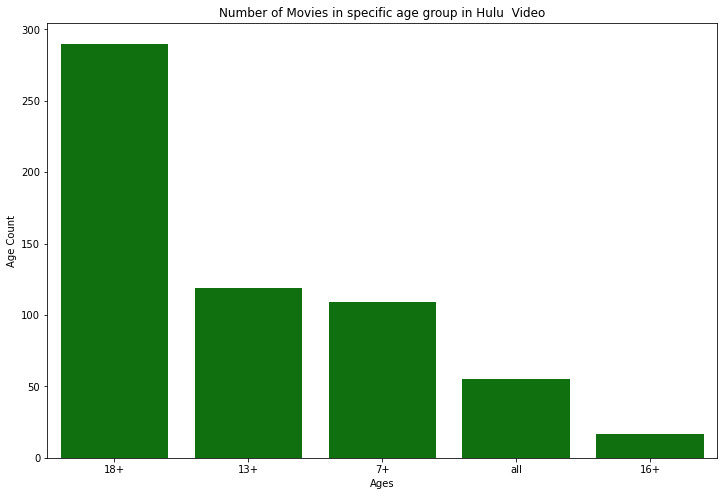

In [137]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = Hulu_df, x = age_hulu, y = Hulu, color = 'green')
ax.set_xlabel("Ages")
ax.set_ylabel("Age Count")


ax.set_title('Number of Movies in specific age group in Hulu  Video') 
 

In [138]:
genres_= dict(df['Genres'].value_counts())
count_genres = dict()
for g,count in genres_.items():
    g = g.split(",")
    for i in g:
        if i in count_genres.keys():
            count_genres[i] = count_genres.get(i)+1
        else:
            count_genres[i] = 1

In [157]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])
a = count_genres_df.head(10)

For the sake of managing space and making my visuals clearer i decided to carry out the top 10 genres in this data set.

In [159]:
count_genres_df['Genre'].head(10)

0          Drama
1    Documentary
2         Comedy
3         Horror
4        Romance
5       Thriller
6         Action
7          Crime
8          Music
9        Mystery
Name: Genre, dtype: object

Text(0.5, 1.0, 'Number of Movies in specific age group in Hulu  Video')

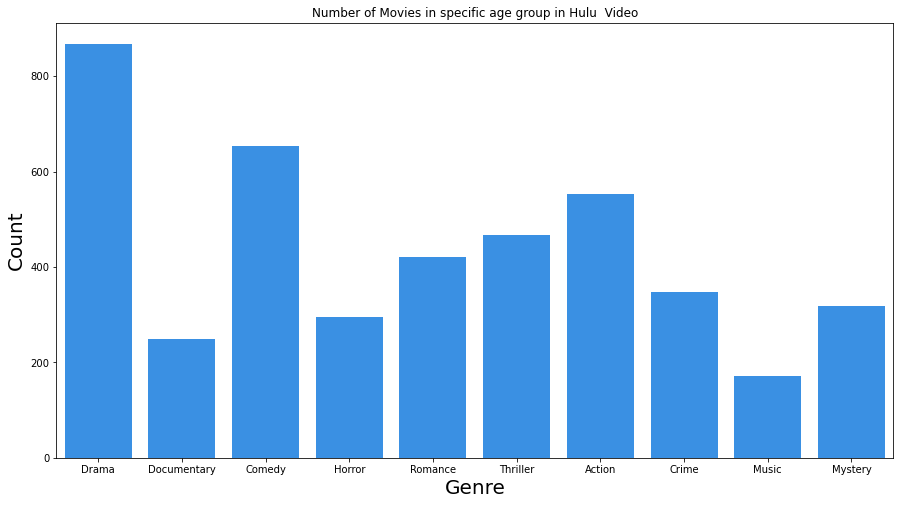

In [168]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data = a, x = count_genres_df['Genre'].head(10), y = count_genres_df['Count'].head(10), color = 'dodgerblue')
ax.set_xlabel("Genre", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)


ax.set_title('Number of Movies in specific age group in Hulu  Video') 
 


#### This clearly shows that "DRAMA" is the highest genre watched 

### NETFLIX TOP MOVIES

In [169]:
data_netflix_top = netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


### AMAZON PRIME TOP MOVIES

In [173]:
amz_top = Amazon_df[Amazon_df['IMDb']>8.5]
amz_top = amz_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
amz_top

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
...,...,...
5730,George Carlin: You Are All Diseased,8.6
5607,Aruvi,8.6
9004,The Legend of Pancho Barnes and the Happy Bott...,8.6
9098,Yellow Colt,8.6


### DISNEY+ TOP MOVIES

In [174]:
disney_top = Disney_df[Disney_df['IMDb']>8.5]
disney_top = disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


### HULU TOP MOVIES

In [175]:
hulu_top = Hulu_df[Hulu_df['IMDb']>8.5]
hulu_top = hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


From this above analysis we have been able to identify the top movies of each platform, the genre with the highest streams, the age-group of movies offered from different platforms. 
